# Exploratory Data Analysis (EDA)

In this section, we will perform an Exploratory Data Analysis (EDA) to understand the characteristics of the dataset. We will:
- Load and inspect the dataset.
- Check for missing values and data types.
- Generate descriptive statistics.
- Visualize the relationships between features and the target variable (power_generated).

Steps:
1. **Load the Dataset**: Import the dataset and view the first few rows.
2. **Data Inspection**: Examine data types, missing values, and basic statistics.
3. **Visualizations**: Create plots to visualize distributions and relationships.
4. **Correlation Analysis**: Analyze correlations between features and the target variable.

By the end of this section, we aim to gain insights into the data's structure and identify any patterns or anomalies that could inform our model-building process.


First few rows of the dataset:
   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                0.859897           69              28         7.5          0   
1                0.628535           69              28         7.5          0   
2                0.397172           69              28         7.5          0   
3                0.165810           69              28         7.5          0   
4                0.065553           69              28         7.5          0   

   visibility  humidity  average-wind-speed-(period)  \
0        10.0        75                          8.0   
1        10.0        77                          5.0   
2        10.0        70                          0.0   
3        10.0        33                          0.0   
4        10.0        21                          3.0   

   average-pressure-(period)  power-generated  
0                      29.82                0  
1                      29.85                0  
2

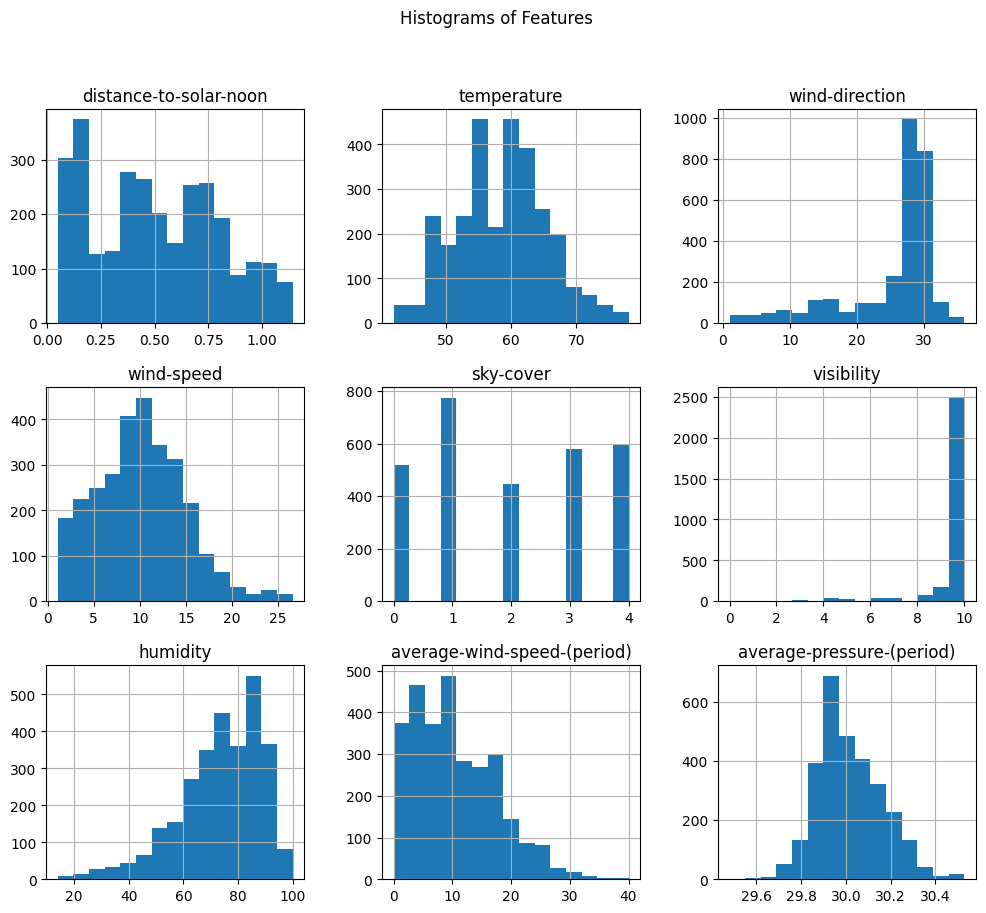

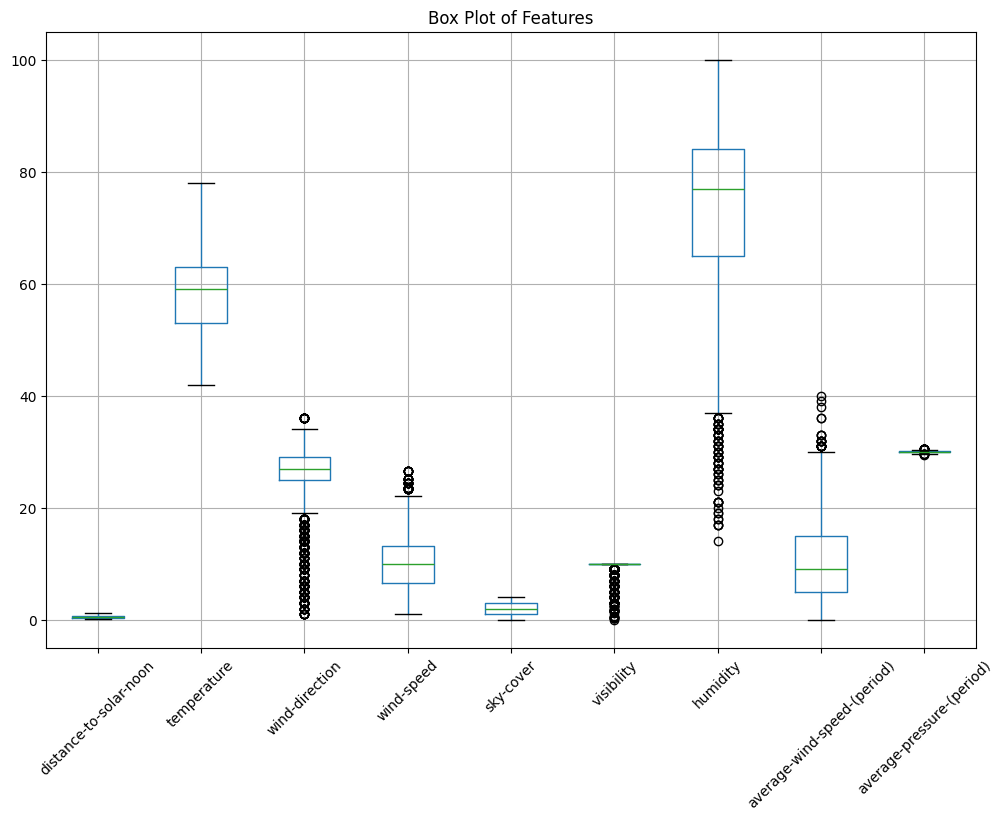


Skewness of each feature:
distance-to-solar-noon         0.211452
temperature                    0.125916
wind-direction                -1.629519
wind-speed                     0.416851
sky-cover                      0.080284
visibility                    -3.862446
humidity                      -0.955607
average-wind-speed-(period)    0.623017
average-pressure-(period)      0.441384
dtype: float64

Kurtosis of each feature:
distance-to-solar-noon         -0.987306
temperature                    -0.287402
wind-direction                  1.856622
wind-speed                      0.078606
sky-cover                      -1.341456
visibility                     15.718494
humidity                        0.872219
average-wind-speed-(period)     0.016375
average-pressure-(period)       0.352309
dtype: float64


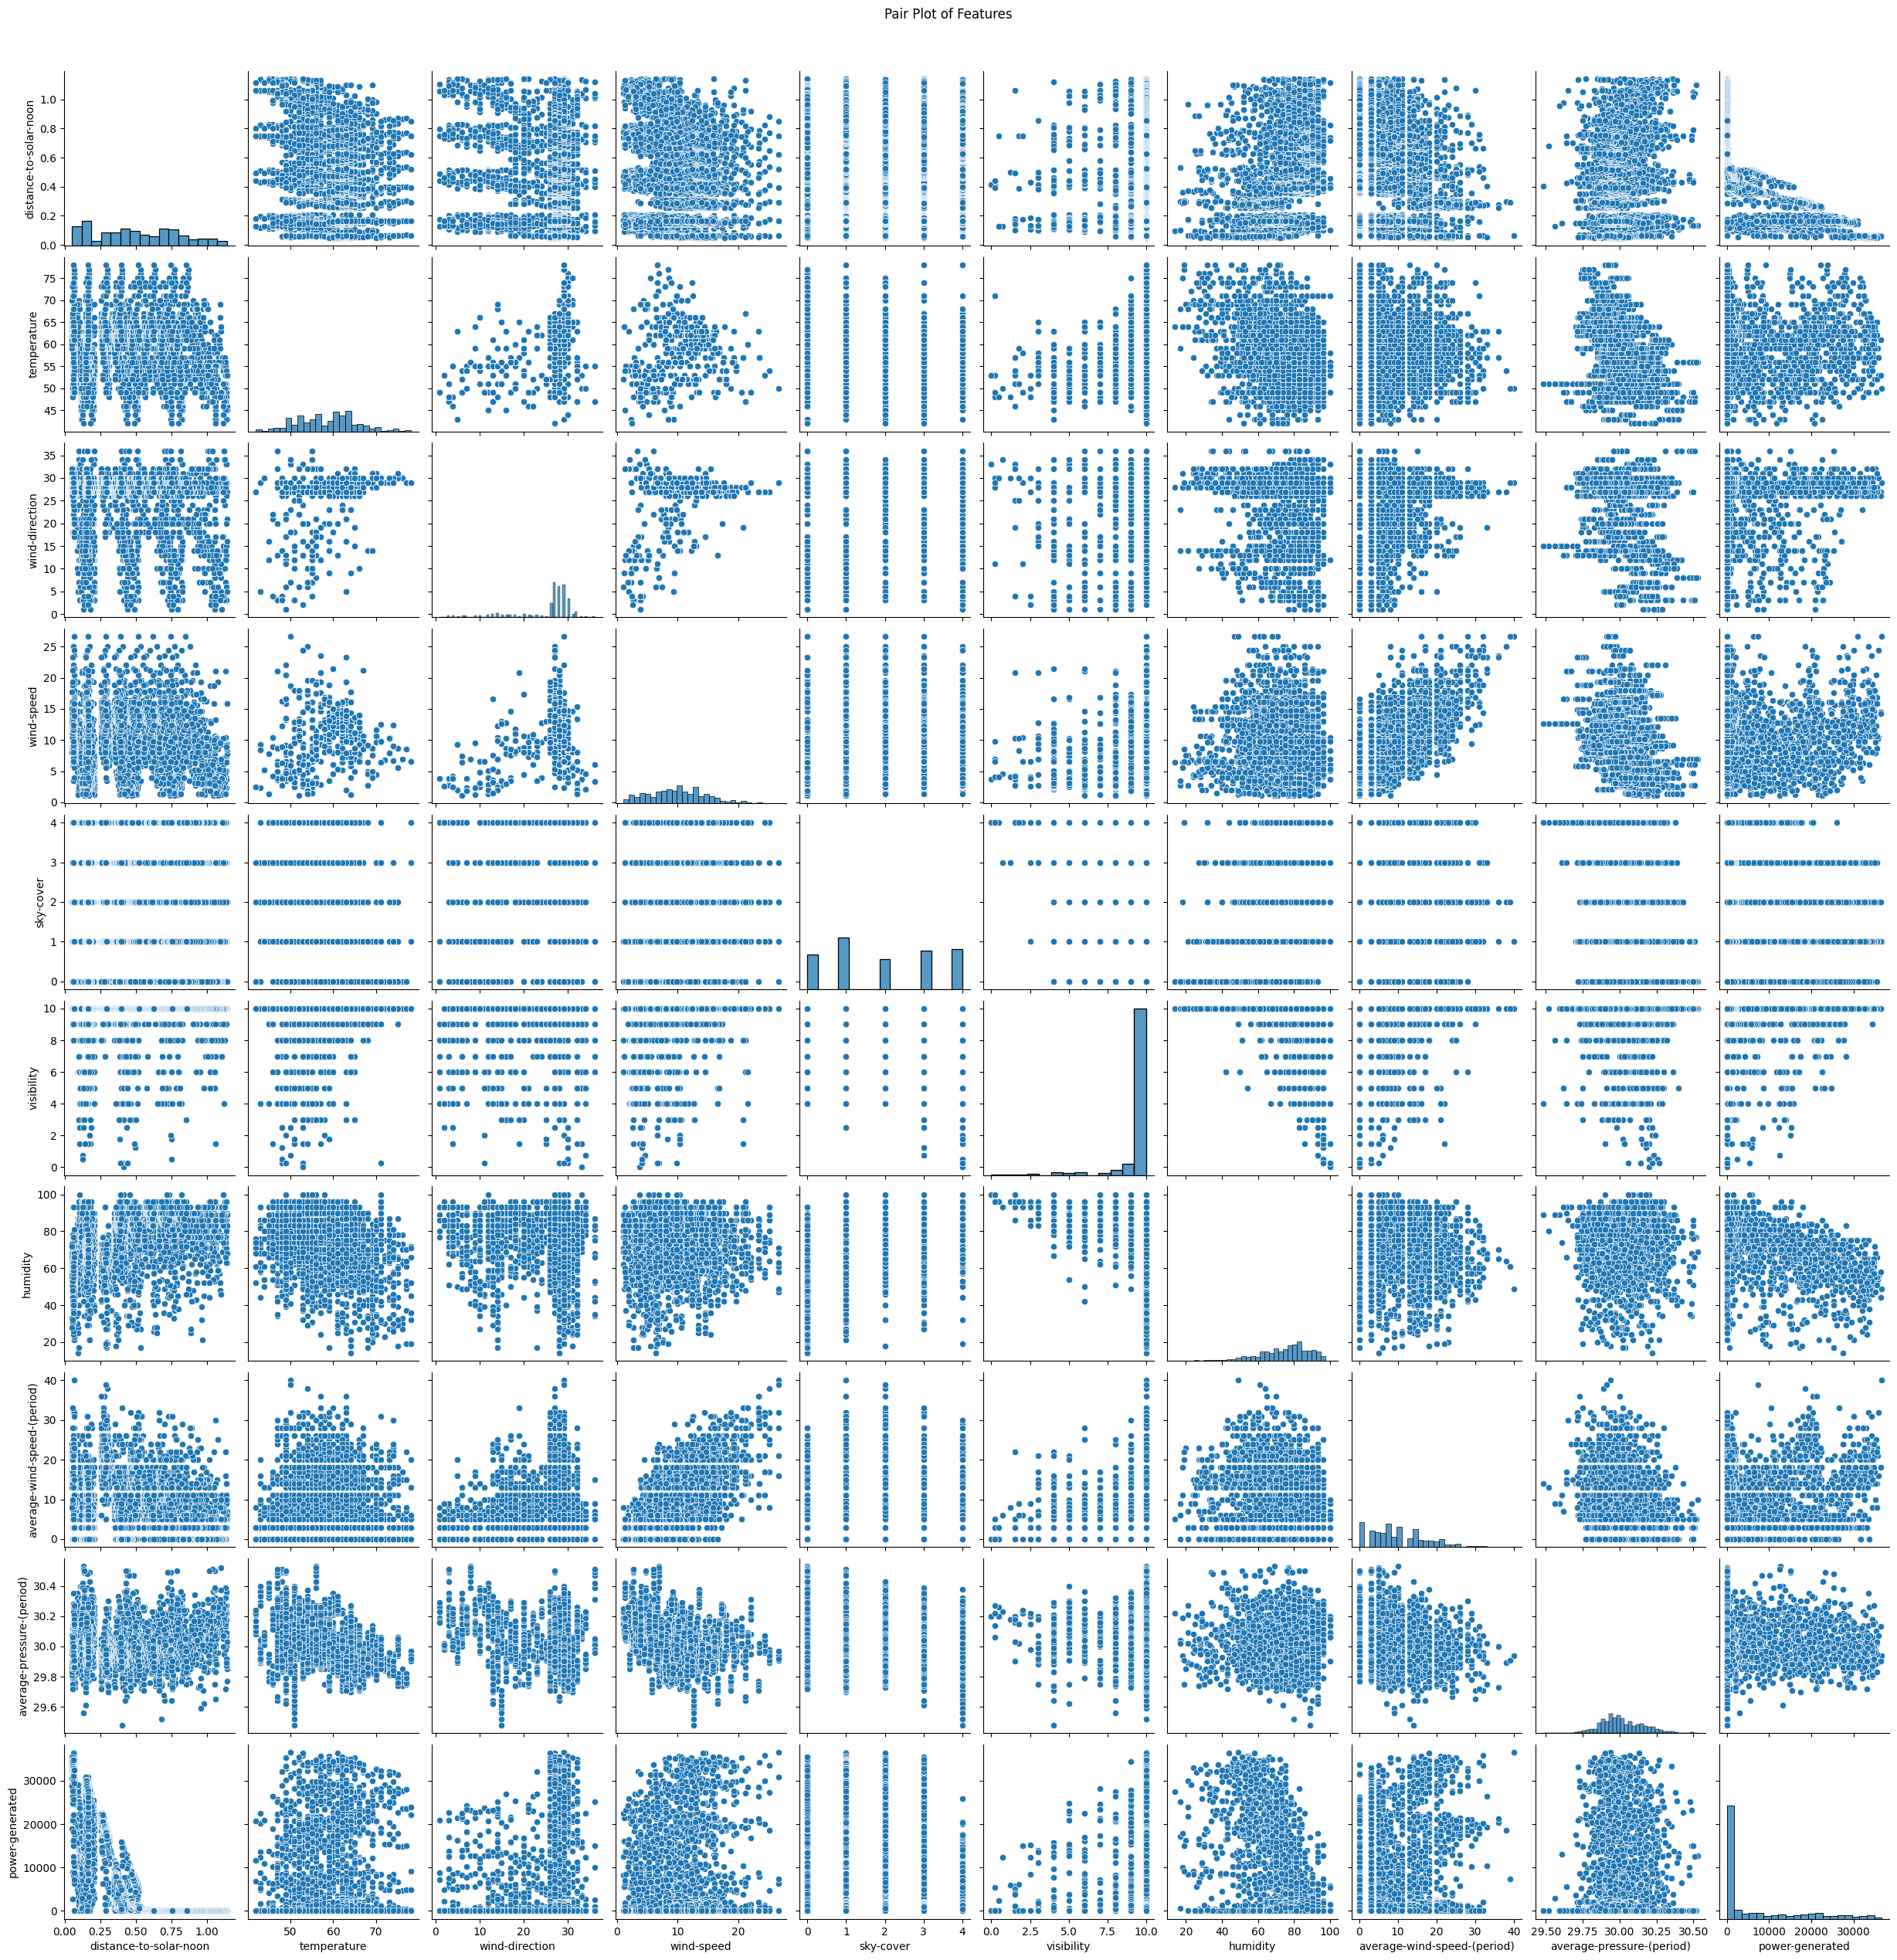

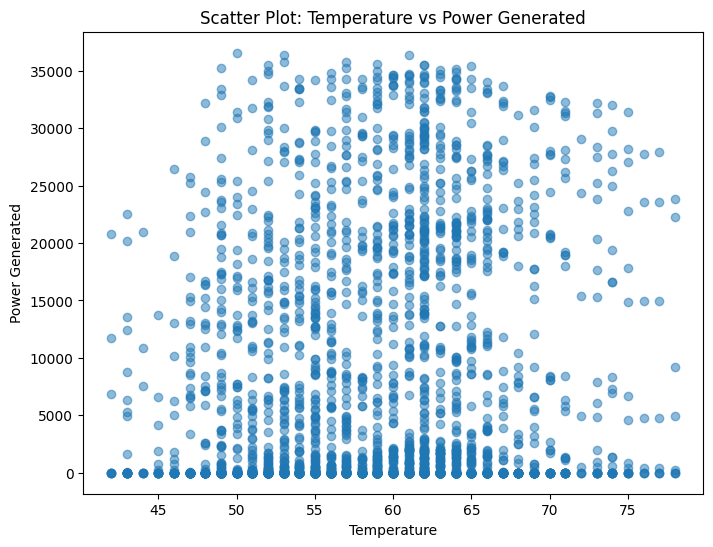

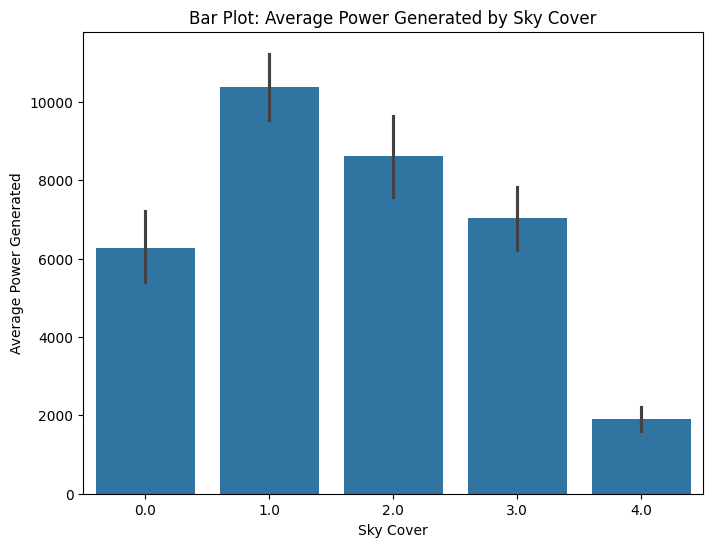

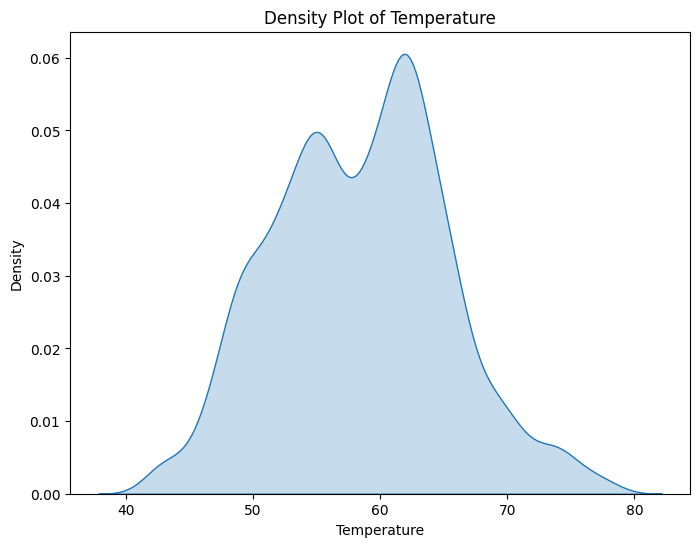

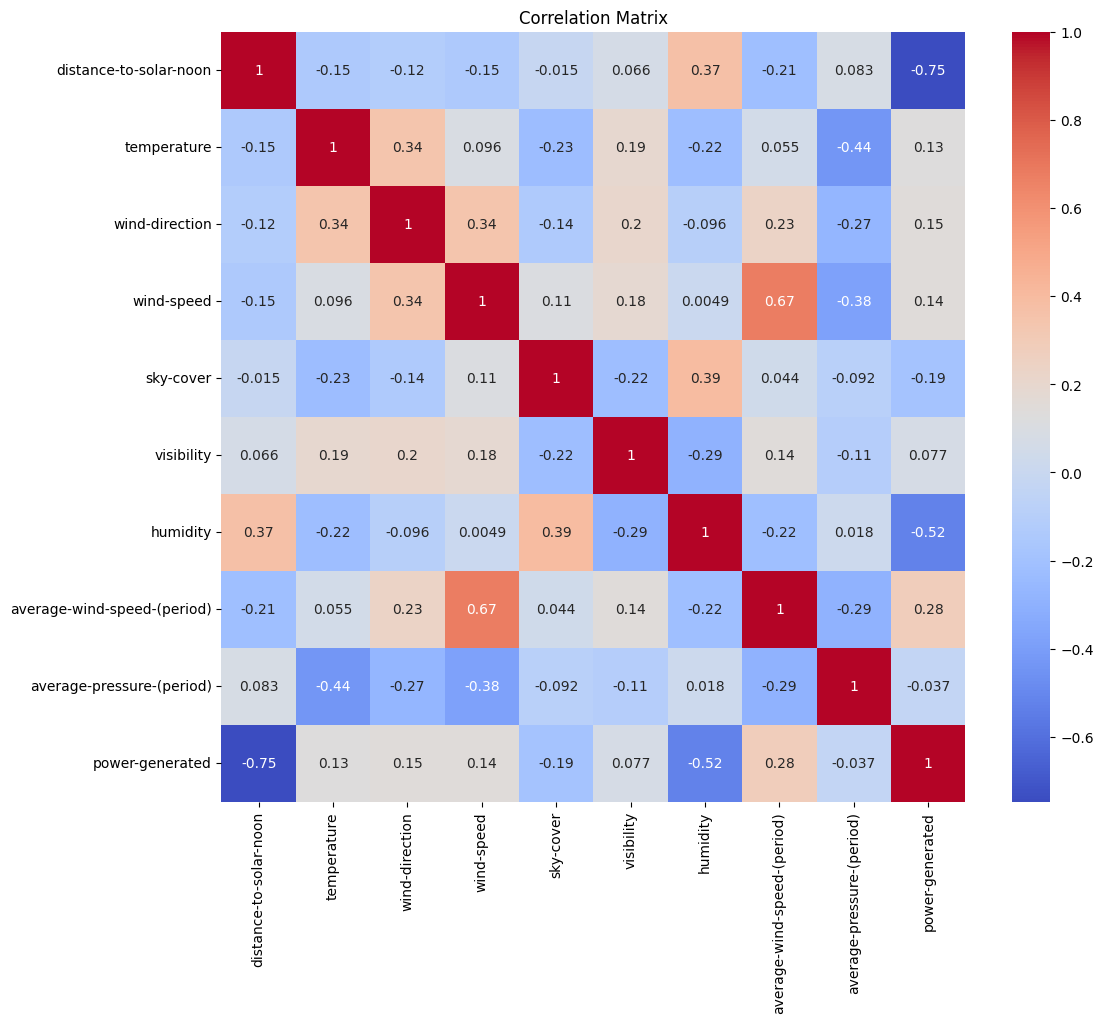


Training Linear Regression model...
Linear Regression model saved as 'linear_regression_model.pkl'.
Linear Regression model loaded.

Linear Regression RMSE: 6284.518798127551
Linear Regression R² score: 0.6250592396092092

Training Random Forest model...

Random Forest RMSE: 3401.8306799485495
Random Forest R² score: 0.8901388897333221

Cross-Validated RMSE for Linear Regression: 6620.432372699825
Cross-Validated RMSE for Random Forest: 3625.829803012761


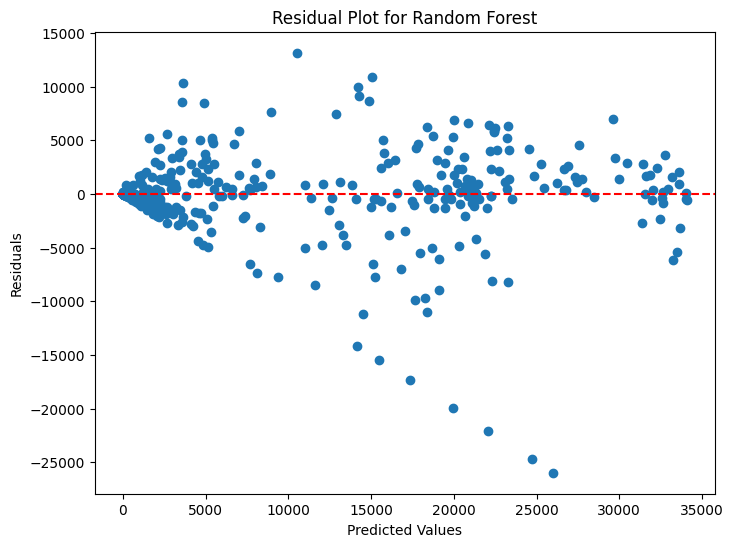

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

# Load the dataset
file_path = 'C:\\Users\\lenovo\\Downloads\\solarpowergeneration.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Data Cleaning
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Fill missing values
imputer = SimpleImputer(strategy='mean')
features = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
            'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 'average-pressure-(period)']
data[features] = imputer.fit_transform(data[features])

# Define the target variable before using it
target = 'power-generated'

# Exploratory Data Analysis (EDA)
print("\nData types and summary statistics:")
print(data.info())
print(data.describe())

# Data Visualization

# Histogram for each feature
data[features].hist(figsize=(12, 10), bins=15)
plt.suptitle('Histograms of Features')
plt.show()

# Box plots for each feature
plt.figure(figsize=(12, 8))
data[features].boxplot()
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

# Skewness and Kurtosis
print("\nSkewness of each feature:")
print(data[features].skew())
print("\nKurtosis of each feature:")
print(data[features].kurtosis())

# Pair plot to visualize relationships
sns.pairplot(data[features + [target]])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

# Scatter plot of temperature vs power-generated
plt.figure(figsize=(8, 6))
plt.scatter(data['temperature'], data[target], alpha=0.5)
plt.title('Scatter Plot: Temperature vs Power Generated')
plt.xlabel('Temperature')
plt.ylabel('Power Generated')
plt.show()

# Bar plot of average power generated by sky cover
plt.figure(figsize=(8, 6))
sns.barplot(x='sky-cover', y=target, data=data)
plt.title('Bar Plot: Average Power Generated by Sky Cover')
plt.xlabel('Sky Cover')
plt.ylabel('Average Power Generated')
plt.show()

# Density plot for temperature
plt.figure(figsize=(8, 6))
sns.kdeplot(data['temperature'], fill=True)  # Updated 'shade' to 'fill'
plt.title('Density Plot of Temperature')
plt.xlabel('Temperature')
plt.show()


# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

# Define features and target variable
X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building and Training
print("\nTraining Linear Regression model...")
lr = LinearRegression()
lr.fit(X_train, y_train)

# Save the trained model
joblib.dump(lr, 'linear_regression_model.pkl')
print("Linear Regression model saved as 'linear_regression_model.pkl'.")

# Load the model
lr_model = joblib.load('linear_regression_model.pkl')
print("Linear Regression model loaded.")

# Make predictions
lr_pred = lr_model.predict(X_test)

# Evaluate the Linear Regression model
print("\nLinear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Regression R² score:", r2_score(y_test, lr_pred))

# Training and Evaluating Random Forest model
print("\nTraining Random Forest model...")
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R² score:", r2_score(y_test, rf_pred))

# Cross-Validation
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_root_mean_squared_error')
rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')

print("\nCross-Validated RMSE for Linear Regression:", -lr_cv_scores.mean())
print("Cross-Validated RMSE for Random Forest:", -rf_cv_scores.mean())

# Residual Analysis for Random Forest
residuals = y_test - rf_pred
plt.figure(figsize=(8, 6))
plt.scatter(rf_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.axhline(0, linestyle='--', color='r')
plt.show()


## Conclusion

The performance of the Linear Regression and Random Forest models was evaluated using the solar power generation dataset.

**Linear Regression Model:**
- **RMSE**: 6284.52
- **R² Score**: 0.625
- **Cross-Validated RMSE**: 6620.43

**Random Forest Model:**
- **RMSE**: 3401.83
- **R² Score**: 0.890
- **Cross-Validated RMSE**: 3625.83

**Insights:**
- The Random Forest model outperforms the Linear Regression model in both RMSE and R² score, indicating a better fit to the data and more accurate predictions.
- The Random Forest model has a significantly lower RMSE and higher R² score, suggesting it captures the complexity and non-linear relationships in the data more effectively than the Linear Regression model.
- Cross-validation results further confirm the superior performance of the Random Forest model, with lower RMSE values compared to Linear Regression.

**Visualizations:**
- The correlation matrix and histograms provided insights into the relationships between features and their distributions.
- The residual plot for the Random Forest model showed a random scatter of residuals around zero, indicating a well-fitted model.

Overall, the Random Forest model is preferred for predicting power generation based on the given features due to its higher accuracy and better performance metrics.


# Model Building

In this section, we will build and train regression models to predict the power generated based on environmental variables. We will:
- Prepare the data for modeling (e.g., feature scaling, splitting data).
- Select and train various regression models.
- Tune hyperparameters to improve model performance.

Steps:
1. **Data Preparation**: Handle missing values, encode categorical variables, and split the data into training and testing sets.
2. **Model Selection**: Choose and train multiple regression models (e.g., Linear Regression, Decision Trees, Random Forest).
3. **Hyperparameter Tuning**: Optimize model performance using techniques like Grid Search or Random Search.

By the end of this section, we will have a set of trained models and will be ready to evaluate their performance.


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib  # For saving and loading models

# Load the dataset
file_path = r"C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel project\solarpowergeneration.csv"
df = pd.read_csv(file_path)

# Updated column names check
required_columns = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
                    'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 
                    'average-pressure-(period)', 'power-generated']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Columns {missing_columns} not found in the DataFrame.")

# Feature Selection
X = df.drop(columns=['power-generated'])
y = df['power-generated']
# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute with mean
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# 1. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 2. Gradient Boosting Model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# 3. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)  # Ensure this line is not split
lr_pred = lr_model.predict(X_test)  # Corrected line

# Model Evaluation
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("-" * 30)

# Evaluate each model
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, gb_pred, "Gradient Boosting")
evaluate_model(y_test, lr_pred, "Linear Regression")

# Save the models to files
model_dir = r"C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel project"

joblib.dump(rf_model, f"{model_dir}/random_forest_model.pkl")
joblib.dump(gb_model, f"{model_dir}/gradient_boosting_model.pkl")
joblib.dump(lr_model, f"{model_dir}/linear_regression_model.pkl")

print("Models have been saved to the project directory.")

# Save predictions to a CSV file
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Random Forest Prediction': rf_pred,
    'Gradient Boosting Prediction': gb_pred,
    'Linear Regression Prediction': lr_pred
}).reset_index(drop=True)

output_file_path = f"{model_dir}/model_predictions.csv"
predictions_df.to_csv(output_file_path, index=False)

print(f"Predictions have been saved to {output_file_path}")


Random Forest Model Evaluation:
Mean Squared Error: 11610744.40199469
R^2 Score: 0.8897753670719873
------------------------------
Gradient Boosting Model Evaluation:
Mean Squared Error: 10426185.226077266
R^2 Score: 0.9010207787205786
------------------------------
Linear Regression Model Evaluation:
Mean Squared Error: 39495176.52401855
R^2 Score: 0.6250592396092093
------------------------------
Models have been saved to the project directory.
Predictions have been saved to C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel project/model_predictions.csv


### Conclusion

#### Model Building 

In this project, we built and evaluated three regression models to predict energy production based on various environmental variables. The following models were developed and assessed:

1. **Random Forest Regressor**
2. **Gradient Boosting Regressor**
3. **Linear Regression**


# Model Evaluation

In this section, we will evaluate the performance of the trained regression models. We will:
- Assess model accuracy using appropriate metrics.
- Compare model performance to identify the best model.
- Interpret the results and provide recommendations based on the findings.

Steps:
1. **Evaluation Metrics**: Calculate performance metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).
2. **Model Comparison**: Compare the results of different models to determine the most effective one.
3. **Result Interpretation**: Analyze the results and provide insights into the model’s predictive capabilities.

By the end of this section, we will have a clear understanding of how well our models perform and how they can be used to predict energy production.


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r"C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel regression\solarpowergeneration.csv"
df = pd.read_csv(file_path)

# Ensure all required columns are present
required_columns = ['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
                    'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)', 
                    'average-pressure-(period)', 'power-generated']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Columns {missing_columns} not found in the DataFrame.")

# Feature Selection
X = df.drop(columns=['power-generated'])
y = df['power-generated']

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Impute with mean
X_imputed = imputer.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

# Dictionary to store predictions
predictions = {
    'Actual': y_test
}

# Train models, make predictions, and evaluate
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    pred = model.predict(X_test)
    predictions[model_name] = pred
    
    # Evaluate model
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} Model Evaluation:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print("-" * 30)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions).reset_index(drop=True)

# Save predictions to a new CSV file
output_file_path = r"C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel regression\model_predictions.csv"
predictions_df.to_csv(output_file_path, index=False)

print(f"Predictions have been saved to {output_file_path}")


Random Forest Model Evaluation:
Mean Squared Error: 11610744.40199469
R^2 Score: 0.8897753670719873
------------------------------
Gradient Boosting Model Evaluation:
Mean Squared Error: 10426185.226077266
R^2 Score: 0.9010207787205786
------------------------------
Linear Regression Model Evaluation:
Mean Squared Error: 39495176.52401855
R^2 Score: 0.6250592396092093
------------------------------
Predictions have been saved to C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel regression\model_predictions.csv


##### Model Evaluation Results

1. **Random Forest Regressor**
   - **Mean Squared Error (MSE):** 11,610,744.40
   - **R^2 Score:** 0.89
   
   The Random Forest model performed well, with a high R^2 score indicating that it explained a significant portion of the variance in the energy production. The MSE is moderate, suggesting reasonable prediction accuracy.

2. **Gradient Boosting Regressor**
   - **Mean Squared Error (MSE):** 10,426,185.23
   - **R^2 Score:** 0.90

   The Gradient Boosting model achieved the best performance among the models tested, with the lowest MSE and the highest R^2 score. This indicates it provided the most accurate predictions, capturing the variance in the target variable effectively.

3. **Linear Regression**
   - **Mean Squared Error (MSE):** 39,495,176.52
   - **R^2 Score:** 0.63

   The Linear Regression model, while simpler, had the lowest performance among the three. The high MSE and lower R^2 score suggest it was less effective in capturing the relationships between the features and the target variable compared to the ensemble methods.



##### Conclusion

The Gradient Boosting Regressor is the most accurate model for predicting energy production, with the lowest MSE and highest R^2 score. It outperforms both the Random Forest Regressor and Linear Regression, which indicates its robustness and effectiveness in handling the complexity of the data.

The predictions from all models have been saved to a CSV file located at `C:\Users\lenovo\Desktop\Husain\Excelr\Data Science\Data Science Projects\solar panel regression\model_predictions.csv`.

These results suggest that ensemble methods like Gradient Boosting can provide significant improvements over simpler models in this context. Further tuning and cross-validation might enhance the performance even more.